# Ïù¥Ï†Ñ Í≤åÏãúÎ¨º

[1Ìé∏. Ïù¥ÏÉÅÌÉêÏßÄ ÎÑà Î≠êÏïº?](https://dacon.io/codeshare/4758)  
[2Ìé∏. Ïã†Ïö©Ïπ¥Îìú ÏÇ¨Í∏∞ ÌÉêÏßÄ(1Î∂Ä)](https://dacon.io/codeshare/4833)  
[3Ìé∏. Ïã†Ïö©Ïπ¥Îìú ÏÇ¨Í∏∞ ÌÉêÏßÄ(2Î∂Ä)](https://dacon.io/codeshare/4853)  
[4Ìé∏. ÎπÑÏßÄÎèÑ ÌïôÏäµ Í∏∞Î∞òÏùò Î®∏Ïã†Îü¨Îãù Í∏∞Î≤ï(1Î∂Ä)](https://dacon.io/codeshare/4874)  
[5Ìé∏. ÎπÑÏßÄÎèÑ ÌïôÏäµ Í∏∞Î∞òÏùò Î®∏Ïã†Îü¨Îãù Í∏∞Î≤ï(2Î∂Ä)](https://dacon.io/codeshare/4890)  
[6Ìé∏. ÎπÑÏßÄÎèÑ ÌïôÏäµ Í∏∞Î∞òÏùò Î®∏Ïã†Îü¨Îãù Í∏∞Î≤ïÏùÑ ÌôúÏö©Ìïú Ïù¥ÏÉÅÌÉêÏßÄ(1Î∂Ä)](https://dacon.io/codeshare/4954)

## **CONTENTS**

#### **0. Ïã†Ïö©Ïπ¥Îìú Í±∞Îûò Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**

#### **1. SRPÎ•º ÌôúÏö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

#### **2. ÎπÑÏÑ†Ìòï Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

#### **3. ÏÇ¨Ï†Ñ ÌïôÏäµÏùÑ ÌôúÏö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

#### **4. ICAÎ•º ÌôúÏö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

### **0. Ïã†Ïö©Ïπ¥Îìú Í±∞Îûò Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**
6Ìé∏ 1Î∂ÄÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò Ïã†Ïö©Ïπ¥Îìú Í±∞Îûò Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú Î∂àÎü¨Ïò§ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§

In [34]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data = pd.read_csv('/content/drive/My Drive/dataset/credit_card.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

#### ÌîºÏ≤ò ÌñâÎ†¨ Î∞è Î†àÏù¥Î∏î Î∞∞Ïó¥ ÏÉùÏÑ±ÌïòÍ∏∞
Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Ïù∏ ÌîºÏ≤ò ÌñâÎ†¨ XÎ•º ÏÉùÏÑ±ÌïòÍ≥†, Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìï† Î†àÏù¥Î∏î ÌñâÎ†¨ y(1ÏùÄ ÏÇ¨Í∏∞, 0ÏùÄ Ï†ïÏÉÅ)ÏùÑ Î∂ÑÎ¶¨ÌïòÍ≤†ÏäµÎãàÎã§.

In [37]:
# Suppress warnings
pd.set_option('mode.chained_assignment', None)

# Split to train and test and scale features
dataX = data.drop(['Class'],axis=1)
dataY = data.loc[:,'Class'].copy()

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)
    
featuresToScale = X_train.columns
sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

data_X = data.drop('Class', axis = 1)
data_y = data['Class']

#### Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
sklearnÏùò Ïä§ÏºÄÏùº Ï°∞Ï†ï Ïä§ÏºÄÏùºÎü¨Ïù∏ StandardScalerÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌèâÍ∑†Ïù¥ 0Ïù¥Í≥†, Î∂ÑÏÇ∞Ïù¥ 1Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎêòÎèÑÎ°ù scaleÌï¥Ï§çÎãàÎã§.

scaleÏùÑ ÌïòÏßÄ ÏïäÏúºÎ©¥ Ï∞®Ïõê Ï∂ïÏÜå ÏßÑÌñâÏãú Î≥ÄÏù∏Ïù¥ Í∞ÄÏßÑ Í∞íÏùò ÌÅ¨Í∏∞Ïóê Îî∞Îùº ÏÑ§Î™Ö Í∞ÄÎä•Ìïú Î∂ÑÏÇ∞ÎüâÏù¥ ÏôúÍ≥°Îê† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î∞òÎìúÏãú Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌïòÍ∏∞ Ïù¥Ï†ÑÏóê ÌëúÏ§ÄÌôîÎ•º ÏßÑÌñâÌï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

In [38]:
featuresToScale = data_X.columns
sX = pp.StandardScaler(copy=True)
data_X.loc[:,featuresToScale] = sX.fit_transform(data_X[featuresToScale])

#### ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î∂ÑÌï†ÌïòÍ∏∞
Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌïôÏäµÏãúÌÇ¨ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏù¥ ÏòàÏ∏°Ìï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÏùò ÏÑ±Îä•Ïù¥ Î®∏Ïã†Îü¨Îãù ÌîÑÎ°úÏ†ùÌä∏Ïùò Í∂ÅÍ∑πÏ†Å ÏÑ±Í≥µ Ï≤ôÎèÑÍ∞Ä Îê† Í≤ÉÏûÖÎãàÎã§.

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò 67%Î•º ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã, 33%Î•º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ≥†, Í≤∞Í≥ºÎ•º ÏâΩÍ≤å Ïû¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ random_stateÎ•º 2018Î°ú Í≥†Ï†ïÌñàÏúºÎ©∞, ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏÇ¨Í∏∞ ÎπÑÏú®(0.17%)Î•º Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Ï∏µÌôîÎß§Í∞úÎ≥ÄÏàò, stratifyÎ•º data_yÎ°ú ÏÑ§Ï†ïÌñàÏäµÎãàÎã§. Îî∞ÎùºÏÑú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Í∞ôÏùÄ ÎπÑÏú®Ïùò ÏÇ¨Í∏∞ Îç∞Ïù¥ÌÑ∞Î•º Ïú†ÏßÄÌïòÍ≤å Îê©ÎãàÎã§.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.33, random_state=2018, stratify=data_y)

#### Ïù¥ÏÉÅÏπò ÌèâÍ∞Ä Ìï®ÏàòÏôÄ ÏãúÍ∞ÅÌôî Ìï®Ïàò ÏÉùÏÑ±ÌïòÍ∏∞

In [40]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis = 1)
    loss = pd.Series(data=loss, index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    #Ï†ïÎ∞ÄÎèÑ - Ïû¨ÌòÑÏú® Í≥°ÏÑ†
    plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    #ÏàòÏã†Ïûê Ï°∞Ïûë ÌäπÏÑ±
    plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds
        
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

### **1.SRPÎ•º ÌôúÏö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

SRPÏôÄ Í∞ôÏùÄ Random Projection Î•º Ïù¥Ïö©ÌïòÎ©¥ Î≤°ÌÑ∞ Í∞ÑÏùò Í±∞Î¶¨Î•º Î≥¥Ï°¥ÌïòÎ©∞ Ï∞®ÏõêÏùÑ Ï†ÄÏ∞®ÏõêÏúºÎ°ú Î∞îÍøÄ Ïàò ÏûàÏäµÎãàÎã§.

SRPÎûÄ ÎûúÎç§ Ìà¨ÏòÅ Í∏∞Î≤ïÏ§ë ÌïòÎÇòÎ°ú, ÏõêÎûò Îç∞Ïù¥ÌÑ∞Í∞Ä KxN ÌñâÎ†¨Ïù¥ÎùºÎ©¥, Ïó¨Í∏∞Ïóê ÏûÑÏùòÏùò NxM ÌñâÎ†¨ÏùÑ Í≥±Ìï¥ÏÑú KxM ÌñâÎ†¨Î°ú Î∞îÍæ∏Îäî, NÏ∞®ÏõêÏùÑ MÏ∞®ÏõêÏúºÎ°ú Î≥ÄÌòïÏãúÏºúÏ£ºÎäî Í∏∞Î≤ïÏù¥Î©∞, NxM ÌñâÎ†¨ÏùÑ ÎûúÎç§ÏúºÎ°ú ÎßåÎì†Îã§Îäî Ï†êÏóêÏÑú ÎûúÎç§ Ìà¨ÏòÅÏù¥ÎùºÎäî Ïù¥Î¶ÑÏù¥ Î∂ôÍ≤å ÎêòÏóàÏäµÎãàÎã§.

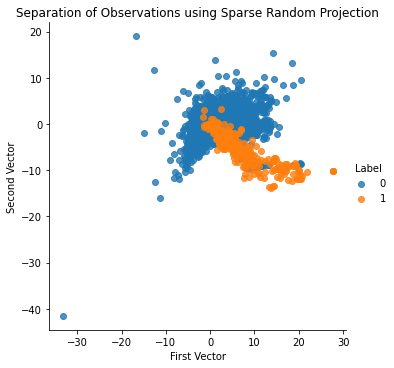

In [41]:
from sklearn.random_projection import SparseRandomProjection

n_components = 27
density = 'auto'
eps = .01
dense_output = True
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, 
                             density=density, 
                             eps=eps, 
                             dense_output=dense_output,
                             random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=X_train.index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

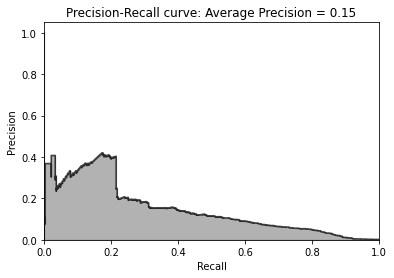

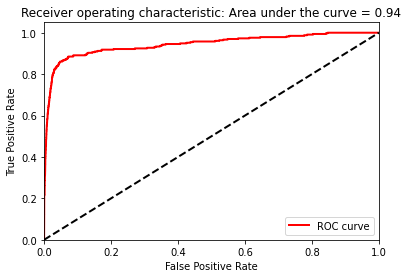

In [42]:
X_train_SRP_inverse = np.array(X_train_SRP).dot(SRP.components_.todense())
X_train_SRP_inverse = pd.DataFrame(data=X_train_SRP_inverse, index=X_train.index)

anomalyScoresSRP = anomalyScores(X_train, X_train_SRP_inverse)
plotResults(y_train, anomalyScoresSRP)

Ïù¥ÏÉÅ ÌÉêÏßÄ ÏãúÏä§ÌÖúÏúºÎ°ú ÌôúÏö©ÌïòÍ∏∞ÏóêÎäî Í≤∞Í≥ºÍ∞Ä Í∑∏Îã§ÏßÄ Ï¢ãÏßÄ ÏïäÏùÄÍ≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

### **2.ÎπÑÏÑ†Ìòï Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

ÏßÄÎÇúÎ≤àÏóê Î∞∞Ïõ†Îçò Isomap, MDS, lle, tsneÎì±Ïùò Í∏∞Î≤ïÏúºÎ°ú, sklearn.manifold ÎÇ¥Î∂Ä Ìï®ÏàòÎ°ú Íµ¨ÌòÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Ï±ÖÏóêÏÑúÎäî Ïù¥Î∂ÄÎ∂ÑÏùÑ Í±¥ÎÑàÎõ∞ÏóàÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî Ïª§ÎÑê PCAÏóêÏÑú ÏßÑÌñâÌñàÎçò Í≤ÉÏ≤òÎüº 2Ï≤úÍ∞ú ÏÉòÌîåÎßå Í∞ÄÏßÄÍ≥† ÌõàÎ†®ÏùÑ ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

#### ISOMAP

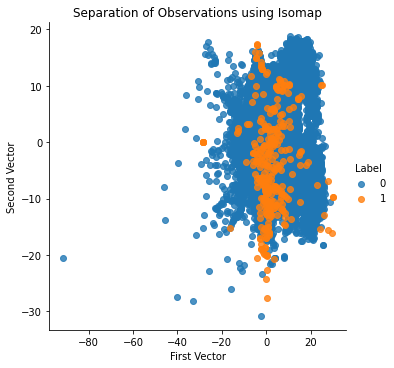

In [43]:
from sklearn.manifold import Isomap

n_components = 27

ISOMAP = Isomap(n_components=n_components)

X_train_ISOMAP = ISOMAP.fit(X_train.iloc[:2000])
X_train_ISOMAP = X_train_ISOMAP.transform(X_train)
X_train_ISOMAP = pd.DataFrame(data=X_train_ISOMAP, index=X_train.index)

scatterPlot(X_train_ISOMAP, y_train, "Isomap")

#### LLE

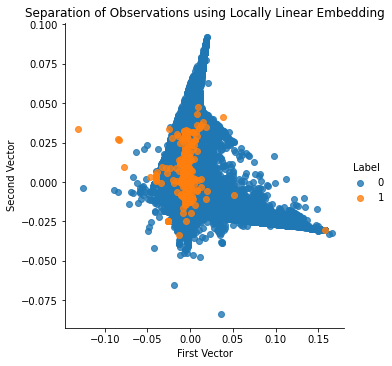

In [44]:
from sklearn.manifold import LocallyLinearEmbedding

n_components = 27
random_state = 2018

LLE = LocallyLinearEmbedding(n_components=n_components, random_state=random_state)

X_train_LLE = LLE.fit(X_train.iloc[:2000])
X_train_LLE = X_train_LLE.transform(X_train)
X_train_LLE = pd.DataFrame(data=X_train_LLE, index=X_train.index)

scatterPlot(X_train_LLE, y_train, "Locally Linear Embedding")

Ïã§Ìñâ ÏÜçÎèÑÎèÑ Îß§Ïö∞ ÎäêÎ¶¨Í≥†, ÏÑ±Îä•ÎèÑ Ï¢ãÏßÄ ÏïäÏúºÎ©∞ ÏÇ¨Ïö©ÌïòÎäî Î©îÎ™®Î¶¨ Ïö©ÎüâÎèÑ ÎßéÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ¨Í∏∞ ÌÉêÏßÄ ÏÜîÎ£®ÏÖòÏóê Ï†ÅÌï©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

### **3.ÏÇ¨Ï†Ñ ÌïôÏäµÏùÑ ÌôúÏö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

ÏÇ¨Ï†Ñ ÌïôÏäµ Î™®Îç∏ÏùÄ batch sizeÎ•º ÏßÄÏ†ïÌï¥ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. 

**batch sizeÎûÄ?**

ÌòÑÏû¨Ïùò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Ï§ë ÏùºÏ†ï Î∂ÄÎ∂Ñ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÎÇòÎàÑÎäî Í≤ÉÏùÑ ÎßêÌï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ 700Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Îïå, batch_sizeÎ•º 100ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï£ºÎ©¥ Ïö∞Î¶¨Îäî 7Í∞úÏùò batchÎ°ú ÎÇòÎà†ÏÑú ÌïôÏäµÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.

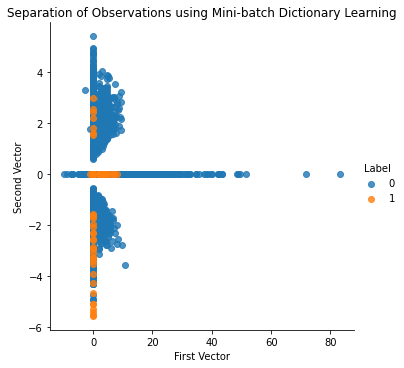

In [45]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 28
alpha = 1
batch_size = 200
n_iter = 10
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
    n_components=n_components, alpha=alpha, batch_size=batch_size, \
    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(X_train)
X_train_miniBatchDictLearning = \
    miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = \
    pd.DataFrame(data=X_train_miniBatchDictLearning, index=X_train.index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

ÏÇ¨Ï†Ñ ÌïôÏäµ Î™®Îç∏ÏùÄ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ÏÑú Ïù¥ÏÉÅÏùÑ Ïûò ÌÉêÏßÄÌïòÏßÄ Î™ªÌïúÎã§Îäî ÏÇ¨Ïã§ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

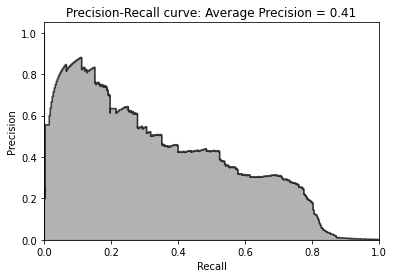

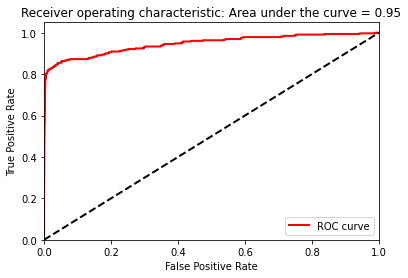

In [46]:
# View plot
X_train_miniBatchDictLearning_inverse = \
    np.array(X_train_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_train_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_train_miniBatchDictLearning_inverse, \
                 index=X_train.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_train, \
    X_train_miniBatchDictLearning_inverse)
preds = plotResults(y_train, anomalyScoresMiniBatchDictLearning, True)

ÏúÑ precision-Recall Í∑∏ÎûòÌîÑÎ•º Î≥¥ÎçîÎùºÎèÑ Ïù¥ÏÉÅ ÌÉêÏßÄÏóê Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÏßÄ ÏïäÎäî Î™®Îç∏Ïù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§.

### **4.ICAÎ•º ÌôúÏö©Ìïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ**

ICAÎûÄ ÎèÖÎ¶Ω ÏÑ±Î∂Ñ Î∂ÑÏÑù(Independent Component Analysis, ICA)ÏúºÎ°ú, Îã§Î≥ÄÎüâÏùò Ïã†Ìò∏Î•º ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÎèÖÎ¶ΩÏ†ÅÏù∏ ÌïòÎ∂Ä ÏÑ±Î∂ÑÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÎäî Í≥ÑÏÇ∞ Î∞©Î≤ïÏûÖÎãàÎã§.

ICAÎäî ÎπÑÏÑ†Ìòï Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Î≤ïÏù¥Î©∞, ÏùºÎ∞ò PCAÏôÄ ÎèôÏùºÌïòÎã§. (Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÌëúÌïòÎäî Í∏∞Ï†ÄÎ≤°ÌÑ∞ Ï∞æÏïÑÏ£ºÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§)

ÏùºÎ∞ò PCAÏôÄ ICAÏùò Ï∞®Ïù¥Ï†ê:

- PCA: Ïö∞ÏÑ†ÏàúÏúÑ - Ï†ïÏÇ¨ÏòÅÏãú Î∂ÑÏÇ∞ ÏµúÎåÄ Î≤°ÌÑ∞

- ICA: Ïö∞ÏÑ†ÏàúÏúÑ - Í≤∞Í≥ºÎì§Ïù¥ ÏµúÎåÄÌïú ÎèÖÎ¶ΩÏ†Å

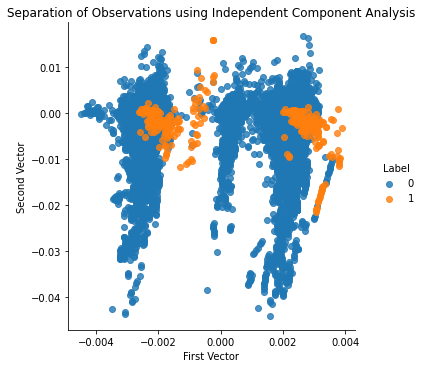

In [47]:
# ÎèÖÎ¶Ω ÏÑ±Î∂Ñ Î∂ÑÏÑù

from sklearn.decomposition import FastICA

n_components = 27
algorithm = 'parallel'
whiten = True
max_iter = 200
random_state = 2018

fastICA = FastICA(n_components=n_components, \
    algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=X_train.index)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse, \
                                       index=X_train.index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

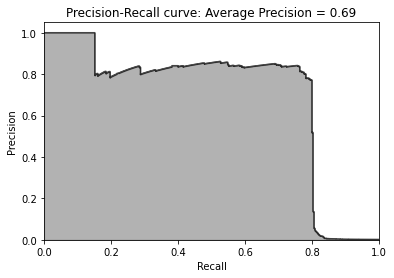

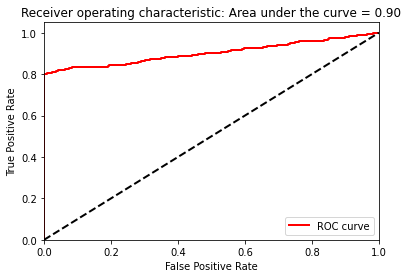

In [48]:
anomalyScoresFastICA = anomalyScores(X_train, X_train_fastICA_inverse)
preds = plotResults(y_train, anomalyScoresFastICA, True)

In [49]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.75
Recall:  0.8
Fraud Caught out of 330 Cases: 264


ICAÎ•º Ïù¥Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î™®Îç∏ÏùÑ ÎßåÎì† Í≤∞Í≥º, PCA Î™®Îç∏Ï≤òÎüº ÌèâÍ∑† Ï†ïÎ∞ÄÎèÑÍ∞Ä 0.75Ïù¥Í≥† ÏÇ¨Í∏∞ Í±∞ÎûòÏùò 80% ÌÉêÏßÄÍ∞Ä Í∞ÄÎä•Ìïú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

### **Í≤∞Î°†**

ÏßÄÍ∏àÍπåÏßÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÎπÑÏßÄÎèÑ Î®∏Ïã†Îü¨Îãù Í∏∞Î∞òÏùò Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Î≤ïÎì§ÏùÑ ÌôúÏö©ÌïòÏó¨ ÏÇ¨Í∏∞ Í±∞Îûò ÌÉêÏßÄ Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Í≥† Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î≥¥ÏïòÏäµÎãàÎã§.

Ïù¥Î≤àÏóê ÏãúÎèÑÌïú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í∏∞Î≤ïÏ§ëÏóêÏÑúÎäî 27Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏùÑ Ïù¥Ïö©Ìïú ICA Í∏∞Î≤ïÏùÑ Ïù¥Ïö©ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏïòÏäµÎãàÎã§.

Îã§Ïùå Ìè¨Ïä§ÌåÖÏóêÎäî 'Ïò§ÌÜ†Ïù∏ÏΩîÎçî Í∞úÎÖê' Ìé∏ÏúºÎ°ú Ï∞æÏïÑÎµôÍ≤†ÏäµÎãàÎã§.

üòäÍ∞êÏÇ¨Ìï©ÎãàÎã§üòä